# Object Detection in Open CV

In [1]:
# Open image in openCv
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

## 1. Template Matching 
* Matching part of image to big image 

In [2]:
full = cv2.imread('DATA/sammy.jpg')
full = cv2.cvtColor(full,cv2.COLOR_BGR2RGB)

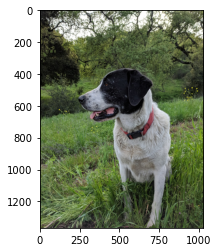

In [3]:
plt.imshow(full)

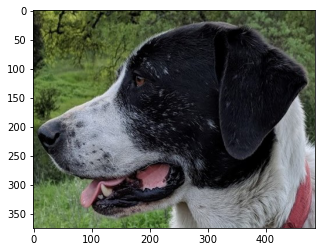

In [4]:
face = cv2.imread('DATA/sammy_face.jpg')
face = cv2.cvtColor(face,cv2.COLOR_BGR2RGB)
plt.imshow(face)

* Try to match the dog face to the full body picture
* Sliding the template picture in the big picture and calculate the distance, spotlight the the predict top left of th template picture inside the big picture
* See formular of six Template Matching Algorithm
"https://docs.opencv.org/4.x/df/dfb/group__imgproc__object.html"

In [5]:
# List of template matching algorithm
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

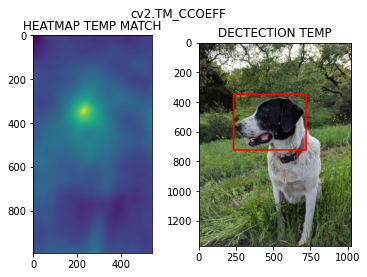

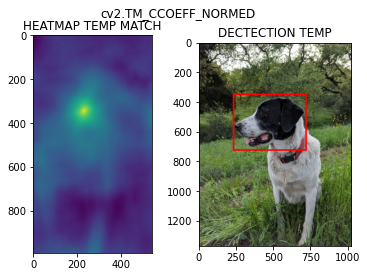

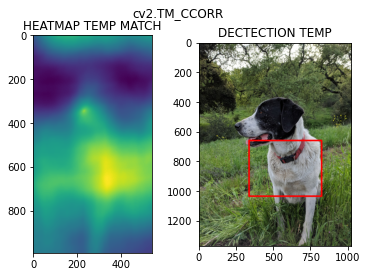

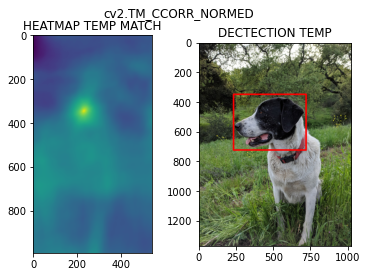

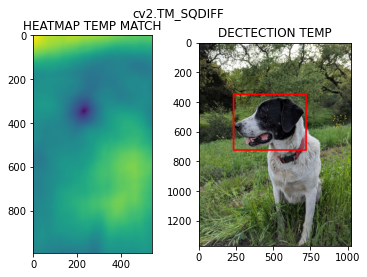

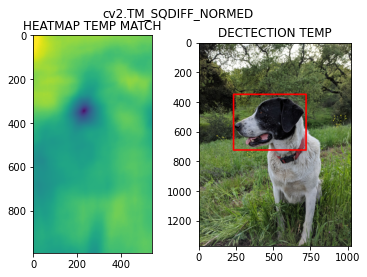

In [6]:
for m in methods:

    # Create copy of image so we not mess up the original
    full_copy = full.copy()
    method = eval(m) # use eval to change string to same name funtion/mehod

    #template matching
    # find the top left point of small picture in big picture
    res = cv2.matchTemplate(full_copy,face,method)
    # return the heatmap of template matching in array
    min_val,max_val,min_loc,max_loc = cv2.minMaxLoc(res) #find global max,min in array

    # with SQDIFF algorithm , the topeleft is the smallest value elss i is highest
    if method in [cv2.TM_SQDIFF,cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    
    height,width,channel = face.shape
    bottom_right = (top_left[0]+width,top_left[1]+height)
    cv2.rectangle(full_copy,top_left,bottom_right,(255,0,0),10)
    
    #plot and show
    plt.subplot(121)
    plt.imshow(res)
    plt.title('HEATMAP TEMP MATCH')

    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title('DECTECTION TEMP')
    plt.suptitle(m)

    plt.show()


## 2. Corner Detection
* Find corner in image
* Finding corrner is not related to the color, so we should perform it in grayscale image

### 2.1 Harris corner algorithm
* See formular :"https://viblo.asia/p/ung-dung-thuat-toan-harris-corner-detector-trong-bai-toan-noi-anh-phan-i-ByEZkyME5Q0"
* When a anchor pixel is sliding at the corner, its intensity will change in every moving direction in contrst with moving on flat plane or edge
* cv2.cornerHarris()

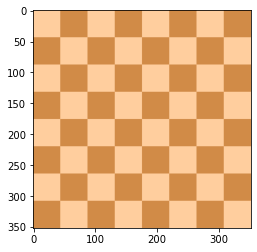

In [7]:
flat_chess = cv2.imread('DATA/flat_chessboard.png')
flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2RGB)
plt.imshow(flat_chess)

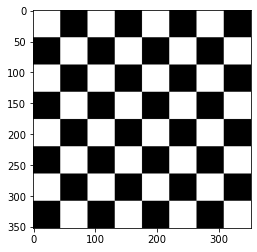

In [8]:
gray_flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2GRAY)
plt.imshow(gray_flat_chess,cmap='gray')

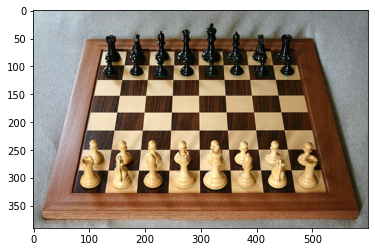

In [9]:
real_chess = cv2.imread('DATA/real_chessboard.jpg')
real_chess = cv2.cvtColor(real_chess,cv2.COLOR_BGR2RGB)
plt.imshow(real_chess)

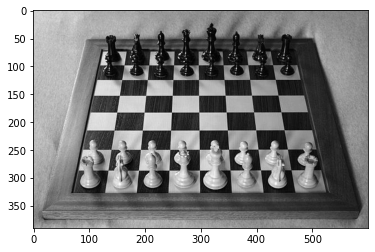

In [10]:
gray_real_chess = cv2.cvtColor(real_chess,cv2.COLOR_BGR2GRAY)
plt.imshow(gray_real_chess,cmap='gray')

In [11]:
gray = np.float32(gray_flat_chess)
dst = cv2.cornerHarris(src=gray,blockSize=2,ksize=3,k=0.04)
dst = cv2.dilate(dst,None) # a denoise method which connect separate detail
flat_chess[dst>0.01*dst.max()] = [255,0,0]
plt.imshow(flat_chess)

In [15]:
gray = np.float32(gray_real_chess)
dst = cv2.cornerHarris(src=gray,blockSize=2,ksize=3,k=0.04)
dst = cv2.dilate(dst,None)
real_chess[dst>0.01*dst.max()] = [255,0,0]
plt.imshow(real_chess)

### 2.2 Shi-Tomashi Algorithm
* Same idea with Harris but different in formular "https://docs.opencv.org/3.4/d4/d8c/tutorial_py_shi_tomasi.html"
* Using cv2.goodFeaturesToTrack()

In [17]:
flat_chess = cv2.imread('DATA/flat_chessboard.png')
flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2RGB)
real_chess = cv2.imread('DATA/real_chessboard.jpg')
real_chess = cv2.cvtColor(real_chess,cv2.COLOR_BGR2RGB)
gray_flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2GRAY)
gray_real_chess = cv2.cvtColor(real_chess,cv2.COLOR_BGR2GRAY)

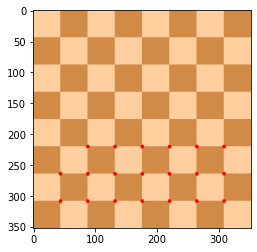

In [18]:
corners = cv2.goodFeaturesToTrack(gray_flat_chess,20,0.01,10)
corners = np.int0(corners)
for i in corners:
    x,y = i.ravel()
    cv2.circle(flat_chess,(x,y),3,(255,0,0),-1)
plt.imshow(flat_chess)


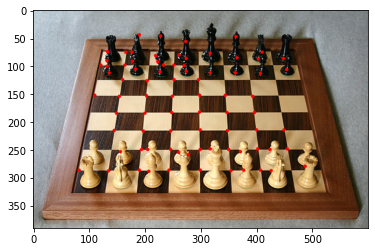

In [19]:
corners = cv2.goodFeaturesToTrack(gray_real_chess,80,0.01,10)
corners = np.int0(corners)
for i in corners:
    x,y = i.ravel()
    cv2.circle(real_chess,(x,y),3,(255,0,0),-1)
plt.imshow(real_chess)

### 3. Edge Detection
* Canny Edge Detection Algorithm
* Formular: "https://docs.opencv.org/3.4/da/d22/tutorial_py_canny.html"
1. Apply filter to smooth the image
2. Find intensity gradient of image
* Find edge gradient of image, this gradient direction always perpendicular to the edge
3. Apply non-maxmum surpression 
* The point on the edge often a local maxmin point, check if the point is max or not
4. Use double threshold to check an detect edge is really edge orr not


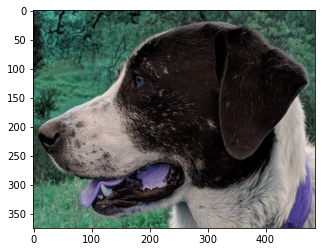

In [20]:
img = cv2.imread('DATA/sammy_face.jpg')
plt.imshow(img)

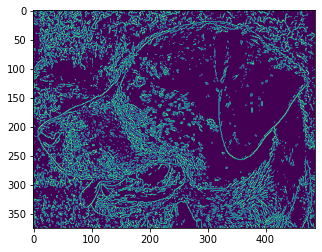

In [21]:
edges = cv2.Canny(image=img,threshold1 = 127, threshold2=127)
plt.imshow(edges)

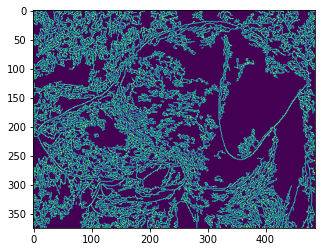

In [22]:
edges = cv2.Canny(image=img,threshold1 = 0, threshold2=255)
plt.imshow(edges)

In [23]:
med_val = np.median(img)
med_val

64.0

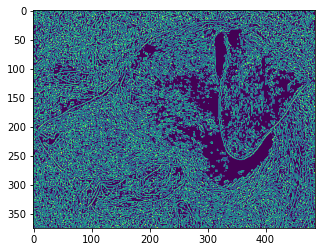

In [24]:
lower = int(max(0,0.7*med_val))
upper = int(min(255,0.7*med_val))
edges = cv2.Canny(image=img,threshold1 = lower, threshold2=upper)
plt.imshow(edges)

* Smooth the image by hand before apply Canny can bring better result

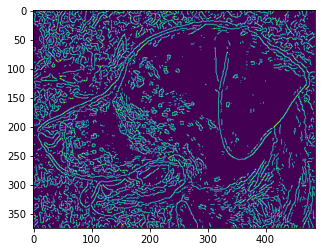

In [25]:
blurred_img = cv2.blur(img,ksize=(5,5))
edges = cv2.Canny(image=blurred_img,threshold1 = lower, threshold2=upper)
plt.imshow(edges)

### 4. Grid Detection
* cv2.findChessboardCorners() for grid
* cv2.findCircleGrid() for circle grid

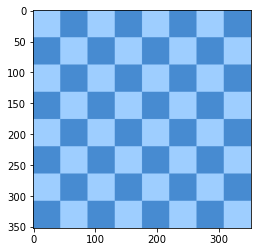

In [26]:
flat_chess = cv2.imread('DATA/flat_chessboard.png')
plt.imshow(flat_chess)

In [27]:
found,corners = cv2.findChessboardCorners(flat_chess,(7,7))
found

(True,
 array([[[ 43.500004,  43.500004]],
 
        [[ 87.5     ,  43.5     ]],
 
        [[131.5     ,  43.5     ]],
 
        [[175.5     ,  43.5     ]],
 
        [[219.5     ,  43.5     ]],
 
        [[263.5     ,  43.5     ]],
 
        [[307.5     ,  43.5     ]],
 
        [[ 43.499996,  87.50001 ]],
 
        [[ 87.5     ,  87.5     ]],
 
        [[131.5     ,  87.5     ]],
 
        [[175.5     ,  87.5     ]],
 
        [[219.5     ,  87.5     ]],
 
        [[263.5     ,  87.5     ]],
 
        [[307.5     ,  87.49999 ]],
 
        [[ 43.500004, 131.5     ]],
 
        [[ 87.5     , 131.5     ]],
 
        [[131.5     , 131.5     ]],
 
        [[175.5     , 131.5     ]],
 
        [[219.5     , 131.5     ]],
 
        [[263.5     , 131.5     ]],
 
        [[307.5     , 131.5     ]],
 
        [[ 43.499996, 175.5     ]],
 
        [[ 87.5     , 175.5     ]],
 
        [[131.5     , 175.5     ]],
 
        [[175.5     , 175.5     ]],
 
        [[219.5     , 175.5     ]],
 
     

In [28]:
cv2.drawChessboardCorners(flat_chess,(7,7),corners,found)
plt.imshow(flat_chess)

array([[[158, 206, 255],
        [158, 206, 255],
        [158, 206, 255],
        ...,
        [ 71, 139, 209],
        [ 71, 139, 209],
        [ 71, 139, 209]],

       [[158, 206, 255],
        [158, 206, 255],
        [158, 206, 255],
        ...,
        [ 71, 139, 209],
        [ 71, 139, 209],
        [ 71, 139, 209]],

       [[158, 206, 255],
        [158, 206, 255],
        [158, 206, 255],
        ...,
        [ 71, 139, 209],
        [ 71, 139, 209],
        [ 71, 139, 209]],

       ...,

       [[ 71, 139, 209],
        [ 71, 139, 209],
        [ 71, 139, 209],
        ...,
        [158, 206, 255],
        [158, 206, 255],
        [158, 206, 255]],

       [[ 71, 139, 209],
        [ 71, 139, 209],
        [ 71, 139, 209],
        ...,
        [158, 206, 255],
        [158, 206, 255],
        [158, 206, 255]],

       [[ 71, 139, 209],
        [ 71, 139, 209],
        [ 71, 139, 209],
        ...,
        [158, 206, 255],
        [158, 206, 255],
        [158, 206, 255]]

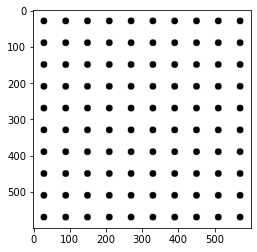

In [30]:
dots = cv2.imread('DATA/dot_grid.png')
plt.imshow(dots)

In [31]:
found,corners = cv2.findCirclesGrid(dots,(10,10),cv2.CALIB_CB_SYMMETRIC_GRID)
found

(True,
 array([[[ 29.5,  29.5]],
 
        [[ 89.5,  29.5]],
 
        [[149.5,  29.5]],
 
        [[209.5,  29.5]],
 
        [[269.5,  29.5]],
 
        [[329.5,  29.5]],
 
        [[389.5,  29.5]],
 
        [[449.5,  29.5]],
 
        [[509.5,  29.5]],
 
        [[569.5,  29.5]],
 
        [[ 29.5,  89.5]],
 
        [[ 89.5,  89.5]],
 
        [[149.5,  89.5]],
 
        [[209.5,  89.5]],
 
        [[269.5,  89.5]],
 
        [[329.5,  89.5]],
 
        [[389.5,  89.5]],
 
        [[449.5,  89.5]],
 
        [[509.5,  89.5]],
 
        [[569.5,  89.5]],
 
        [[ 29.5, 149.5]],
 
        [[ 89.5, 149.5]],
 
        [[149.5, 149.5]],
 
        [[209.5, 149.5]],
 
        [[269.5, 149.5]],
 
        [[329.5, 149.5]],
 
        [[389.5, 149.5]],
 
        [[449.5, 149.5]],
 
        [[509.5, 149.5]],
 
        [[569.5, 149.5]],
 
        [[ 29.5, 209.5]],
 
        [[ 89.5, 209.5]],
 
        [[149.5, 209.5]],
 
        [[209.5, 209.5]],
 
        [[269.5, 209.5]],
 
        [[329

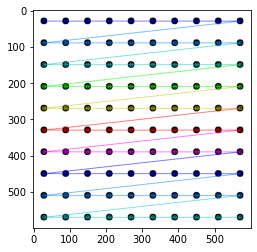

In [32]:
cv2.drawChessboardCorners(dots,(10,10),corners,found)
plt.imshow(dots)

### 5. Contour Detection
* Find contour of object in picture
* contours, hierarchy = cv2.findContours(binaryImage, typeofContour, methodofContour)
* cv2.drawContours(image, contours, contourIndex, colorCode, thickness)

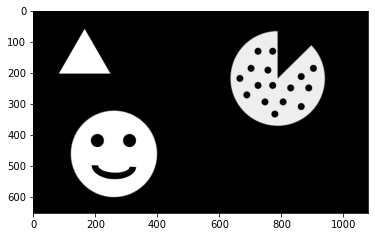

In [33]:
img = cv2.imread('DATA/internal_external.png')
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(img,cmap='gray')

In [34]:
contours,hierarchy = cv2.findContours(img,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)
print(type(contours),len(contours),type(hierarchy))

<class 'tuple'> 22 <class 'numpy.ndarray'>


In [35]:
external_contours = np.zeros(img.shape)

In [36]:
for i in range(len(contours)):

    # external contour
    if hierarchy[0][i][3]==-1:
        cv2.drawContours(external_contours,contours,i,255,-1)

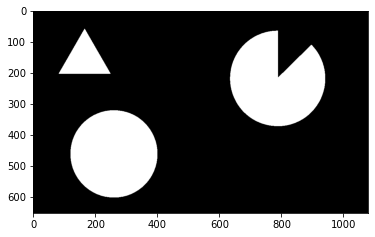

In [37]:
plt.imshow(external_contours,cmap='gray')

In [38]:
internal_contours = np.zeros(img.shape)
for i in range(len(contours)):

    # external contour
    if hierarchy[0][i][3]!=-1:
        cv2.drawContours(internal_contours,contours,i,255,-1)

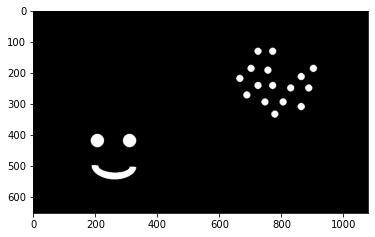

In [39]:
plt.imshow(internal_contours,cmap='gray')